# IXIS Data Science Challenge
## Melissa DiMaio

first, installing necessary libraries

In [1]:
install.packages("xlsx", dependencies = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("tidyverse")
library(dplyr)

also installing the dependencies ‘vroom’, ‘broom’, ‘dbplyr’, ‘dplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘ggplot2’, ‘haven’, ‘modelr’, ‘readr’, ‘rvest’, ‘tidyr’

Warning message in install.packages("tidyverse"):
“installation of package ‘vroom’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘readr’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘haven’ had non-zero exit status”Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



I'm using IBM Watson Studio, which makes you do the following to import data to your project

In [3]:
# The code was removed by Watson Studio for sharing.

dim_year,dim_month,addsToCart
2012,7,191504
2012,8,217666
2012,9,123726
2012,10,139803
2012,11,186572
2012,12,168972


In [4]:
# The code was removed by Watson Studio for sharing.

dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
Safari,tablet,7/1/12,2928,127,221
Internet Explorer,desktop,7/1/12,1106,28,0
Chrome,tablet,7/1/12,474,3,13
Amazon Silk,tablet,7/1/12,235,4,5
Internet Explorer,mobile,7/1/12,178,6,11
Internet Explorer,tablet,7/1/12,120,7,0


Checking structure & data types for each dataframe, convert dim_date to date type 

In [5]:
str(addstocart)

'data.frame':	12 obs. of  3 variables:
 $ dim_year  : int  2012 2012 2012 2012 2012 2012 2013 2013 2013 2013 ...
 $ dim_month : int  7 8 9 10 11 12 1 2 3 4 ...
 $ addsToCart: int  191504 217666 123726 139803 186572 168972 147619 135882 109797 183842 ...


In [6]:
str(sessioncounts)

'data.frame':	7734 obs. of  6 variables:
 $ dim_browser       : Factor w/ 57 levels "(not set)","Amazon Silk",..: 45 24 10 2 24 24 4 19 18 39 ...
 $ dim_deviceCategory: Factor w/ 3 levels "desktop","mobile",..: 3 1 3 3 2 3 2 1 2 2 ...
 $ dim_date          : Factor w/ 365 levels "1/1/13","1/10/13",..: 274 274 274 274 274 274 274 274 274 274 ...
 $ sessions          : int  2928 1106 474 235 178 120 10 9 5 4 ...
 $ transactions      : int  127 28 3 4 6 7 0 0 0 0 ...
 $ QTY               : int  221 0 13 5 11 0 0 0 0 0 ...


In [7]:
sessioncounts$dim_date <- as.Date(sessioncounts$dim_date, format = "%m/%d/%y")

In [8]:
head(sessioncounts)

dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
Safari,tablet,2012-07-01,2928,127,221
Internet Explorer,desktop,2012-07-01,1106,28,0
Chrome,tablet,2012-07-01,474,3,13
Amazon Silk,tablet,2012-07-01,235,4,5
Internet Explorer,mobile,2012-07-01,178,6,11
Internet Explorer,tablet,2012-07-01,120,7,0


checking the unique values to see if there's any funny business, find a value called "error" which sounds fishy

In [9]:
unique(sessioncounts$dim_browser)

[1] Safari                               Internet Explorer                   
 [3] Chrome                               Amazon Silk                         
 [5] Android Browser                      error                               
 [7] Edge                                 Opera                               
 [9] UC Browser                           Puffin                              
[11] SeaMonkey                            (not set)                           
[13] BlackBerry                           osee2unifiedRelease                 
[15] Safari (in-app)                      Android Webview                     
[17] Samsung Internet                     Firefox                             
[19] DESKTOP                              Mozilla Compatible Agent            
[21] Apple-iPhone7C2                      Iron                                
[23] Maxthon                              Mozilla                             
[25] MRCHROME                             YelpWebView                         
[27] Opera Mini                           Seznam                              
[29] YaBrowser                            BrowserNG                           
[31] anonymous                            DDG-Android-3.0.14                  
[33] FeeddlerPro                          SonyEricssonK700c                   
[35] TimesTablet                          Coc Coc                             
[37] DDG-Android-3.1.1                    LG-C410                             
[39] Truefitbot                           NokiaE52-1                          
[41] Nintendo Browser                     Amazon.com                          
[43] NetFront                             IE with Chrome Frame                
[45] NokiaC7-00                           Python-urllib                       
[47] Job Search                           Playstation 3                       
[49] Nokia Browser                        turnaround                          
[51] DDG-Android-3.0.11                   X-WebBrowser                        
[53] DDG-Android-3.0.17                   HubSpot inbound link reporting check
[55] NetNewsWire Browser                  Mobile                              
[57] Chromeless 1.2.0                    
57 Levels: (not set) Amazon Silk Amazon.com Android Browser ... YelpWebView

In [10]:
sessioncounts[which(sessioncounts$dim_browser == "error"),]

,dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY
8,error,desktop,2012-07-01,9,0,0
30,error,desktop,2012-07-02,9,0,0
44,error,desktop,2012-07-03,4,0,0
65,error,desktop,2012-07-04,2,0,0
85,error,desktop,2012-07-05,2,0,0
99,error,desktop,2012-07-06,12,0,0
115,error,desktop,2012-07-07,9,0,0
131,error,desktop,2012-07-08,9,0,0
150,error,desktop,2012-07-09,9,0,0
173,error,desktop,2012-07-10,5,0,0


delete rows equal to error and check the values of the other columns for similar funny business

In [11]:
sessioncounts <- sessioncounts[which(sessioncounts$dim_browser != "error"),]

In [12]:
unique(sessioncounts$dim_deviceCategory)

[1] tablet  desktop mobile 
Levels: desktop mobile tablet

Checking for outliers or strange data 

In [13]:
summary(sessioncounts$sessions)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0    31.0  1413.4   860.5 43559.0 

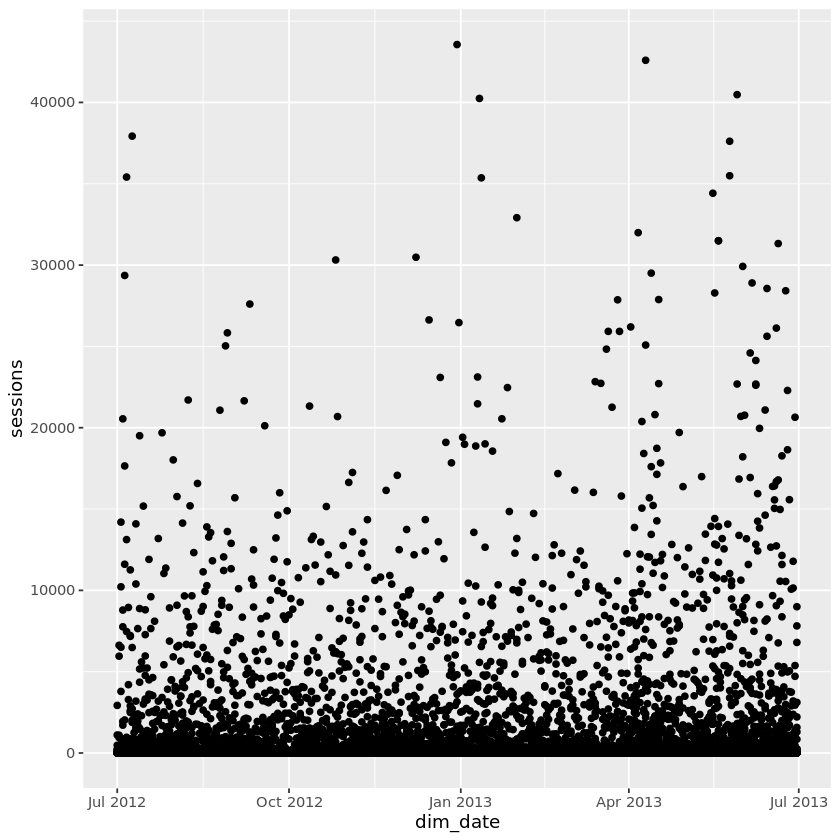

In [15]:
library(ggplot2)
ggplot(sessioncounts) +
     geom_point(aes(x = dim_date, y= sessions))

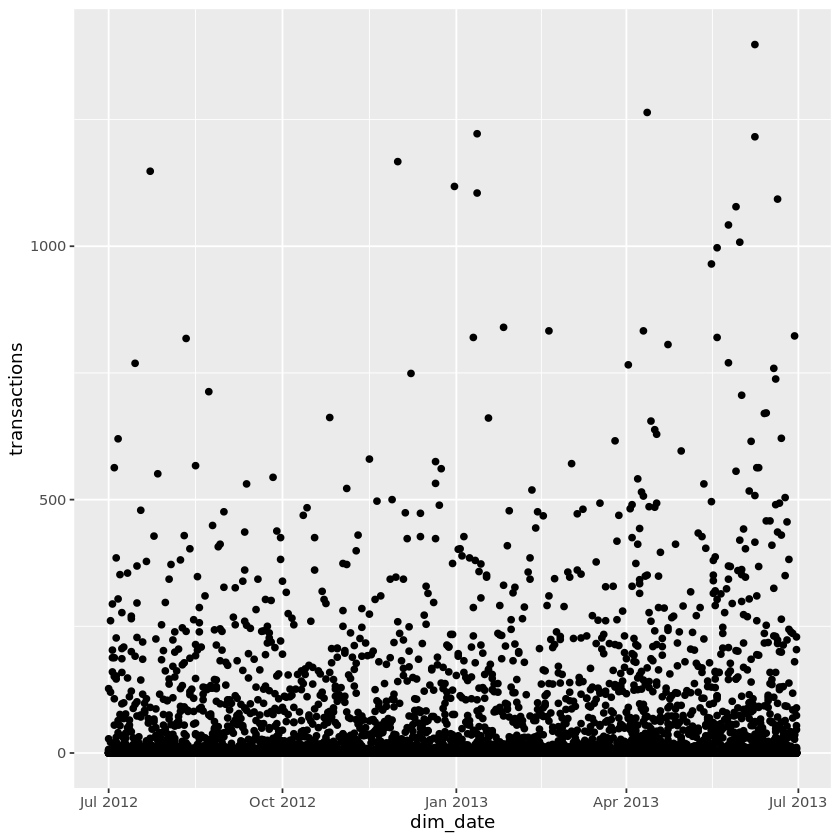

In [16]:
ggplot(sessioncounts) +
     geom_point(aes(x = dim_date, y= transactions))

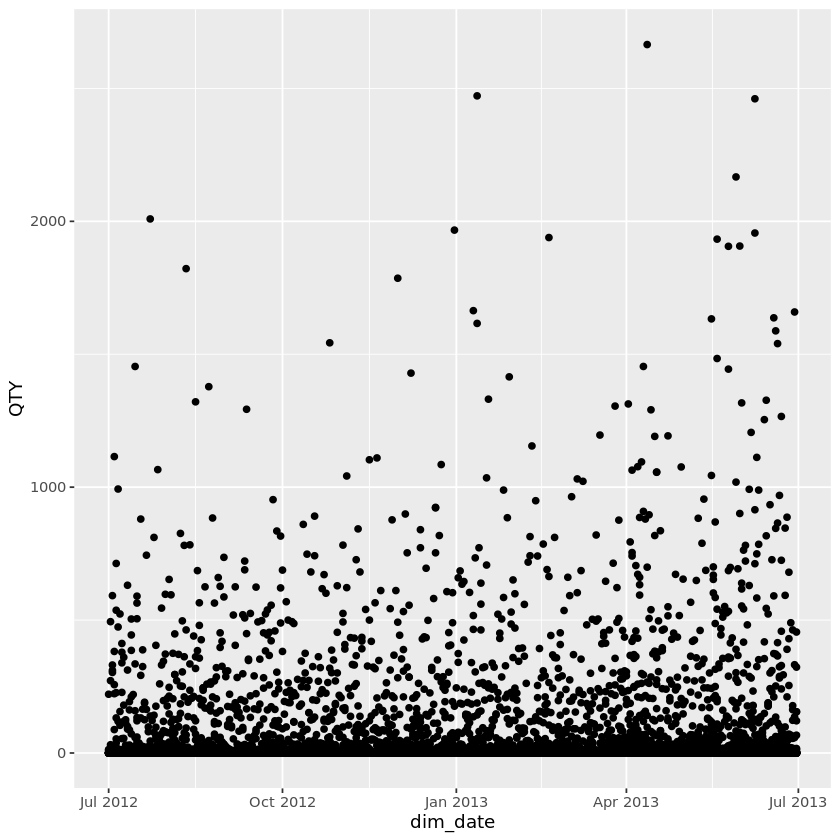

In [51]:
ggplot(sessioncounts) +
     geom_point(aes(x = dim_date, y= QTY))

Finally, checking for any null values

In [17]:
sum(is.na(sessioncounts))

[1] 0

Part 2: creating the new tables

first, adding a new column called Month to sessioncounts with month and year pulled from the Date column

In [21]:
sessioncounts$month <- format(sessioncounts$dim_date, format="%Y-%m")
head(sessioncounts)

dim_browser,dim_deviceCategory,dim_date,sessions,transactions,QTY,month
Safari,tablet,2012-07-01,2928,127,221,2012-07
Internet Explorer,desktop,2012-07-01,1106,28,0,2012-07
Chrome,tablet,2012-07-01,474,3,13,2012-07
Amazon Silk,tablet,2012-07-01,235,4,5,2012-07
Internet Explorer,mobile,2012-07-01,178,6,11,2012-07
Internet Explorer,tablet,2012-07-01,120,7,0,2012-07


second, aggregate by month and device catergory and sum over session, transactions, and qty

In [22]:
finaltable1 <- aggregate(cbind(sessions, transactions, QTY) ~  month + dim_deviceCategory, data = sessioncounts, FUN = sum, na.rm = TRUE)

In [23]:
head(finaltable1)

month,dim_deviceCategory,sessions,transactions,QTY
2012-07,desktop,335226,10701,18547
2012-08,desktop,391909,12912,23316
2012-09,desktop,272639,8898,16507
2012-10,desktop,302514,9373,17675
2012-11,desktop,320574,10350,18778
2012-12,desktop,309540,11613,19947


then add a column for ecr

In [25]:
finaltable1$ECR <- finaltable1$transactions / finaltable1$sessions

In [26]:
head(finaltable1)

month,dim_deviceCategory,sessions,transactions,QTY,ECR
2012-07,desktop,335226,10701,18547,0.03192175
2012-08,desktop,391909,12912,23316,0.03294642
2012-09,desktop,272639,8898,16507,0.03263656
2012-10,desktop,302514,9373,17675,0.03098369
2012-11,desktop,320574,10350,18778,0.03228584
2012-12,desktop,309540,11613,19947,0.03751696


rename dim_deviceCategory to something a little more friendly and voila

In [27]:
finaltable1 <- rename(finaltable1, device_category = dim_deviceCategory) 
finaltable1

month,device_category,sessions,transactions,QTY,ECR
2012-07,desktop,335226,10701,18547,0.031921748
2012-08,desktop,391909,12912,23316,0.032946424
2012-09,desktop,272639,8898,16507,0.032636563
2012-10,desktop,302514,9373,17675,0.030983690
2012-11,desktop,320574,10350,18778,0.032285837
2012-12,desktop,309540,11613,19947,0.037516961
2013-01,desktop,393556,13793,25424,0.035047109
2013-02,desktop,247506,9699,18437,0.039186929
2013-03,desktop,287633,9679,17362,0.033650520
2013-04,desktop,567205,18868,34200,0.033264869


some graphs to make relationships more clear 

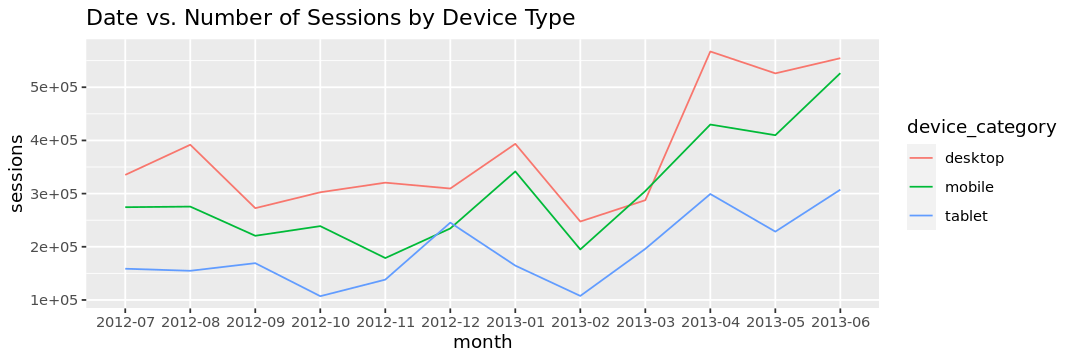

In [28]:
options(repr.plot.width=9, repr.plot.height=3)
ggplot(finaltable1, aes(x = month, y = sessions, colour=device_category, group=device_category)) +
   geom_line() +
    labs(title = "Date vs. Number of Sessions by Device Type")


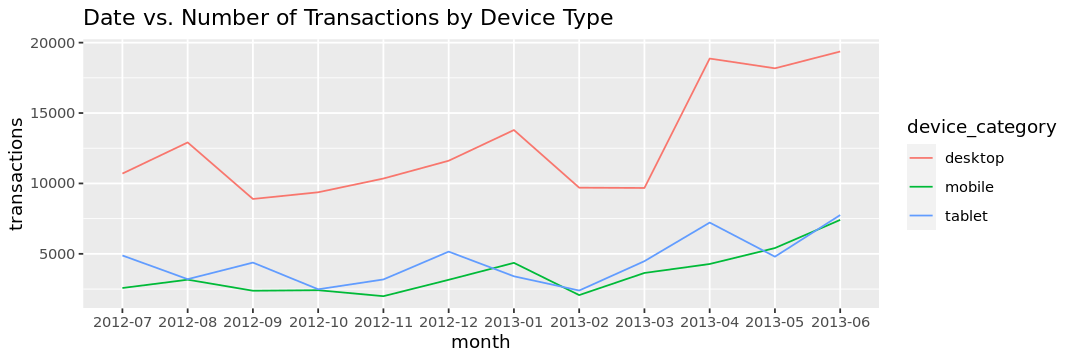

In [29]:
ggplot(finaltable1, aes(x = month, y = transactions, colour=device_category, group=device_category)) +
   geom_line() +
    labs(title = "Date vs. Number of Transactions by Device Type")

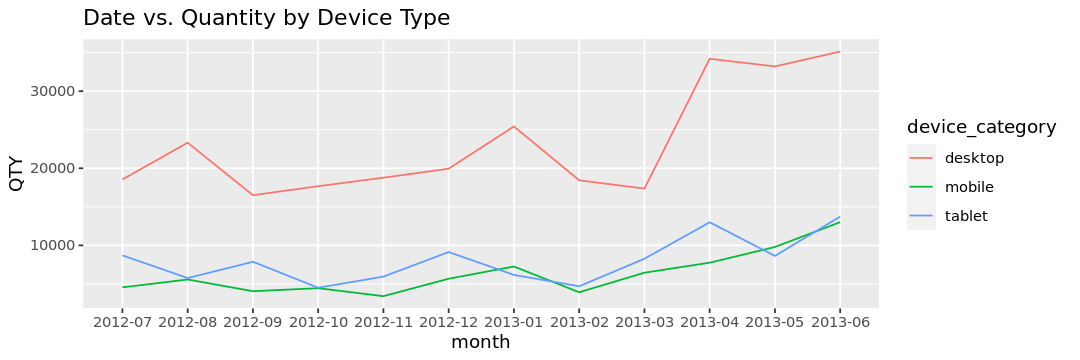

In [30]:
ggplot(finaltable1, aes(x = month, y = QTY, colour=device_category, group=device_category)) +
   geom_line()+
    labs(title = "Date vs. Quantity by Device Type")

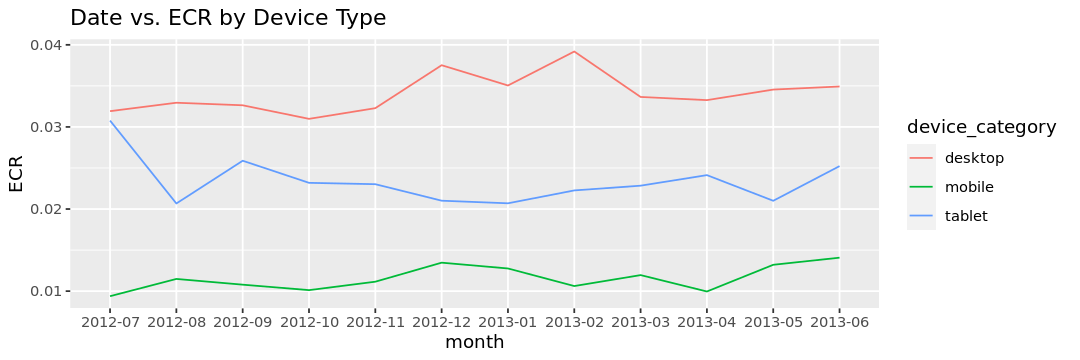

In [31]:
ggplot(finaltable1, aes(x = month, y = ECR, colour=device_category, group=device_category)) +
   geom_line() +
    labs(title = "Date vs. ECR by Device Type")

for the next dataframe, first aggregate by month and add columns for the sums of sessions, transactions, and qty

In [32]:
bymonth <- aggregate(cbind(sessions, transactions, QTY) ~ month, data = sessioncounts, FUN = sum, na.rm = TRUE)
bymonth

month,sessions,transactions,QTY
2012-07,768386,18161,31804
2012-08,822323,19279,34648
2012-09,662521,15658,28426
2012-10,648471,14275,26626
2012-11,637637,15527,28132
2012-12,789456,19929,34752
2013-01,899825,21560,38846
2013-02,550101,14166,27048
2013-03,788616,17804,32082
2013-04,1296308,30369,54946


then take a subset of the last 2 months

In [35]:
bymonth_subset <- tail(subset(bymonth, month >= "05-2013"), n=2)

In [36]:
bymonth_subset

,month,sessions,transactions,QTY
11,2013-05,1164384,28389,51629
12,2013-06,1388526,34538,61891


add a column for ecr

In [37]:
bymonth_subset$ECR <- bymonth_subset$transactions / bymonth_subset$sessions

In [38]:
bymonth_subset

,month,sessions,transactions,QTY,ECR
11,2013-05,1164384,28389,51629,0.02438113
12,2013-06,1388526,34538,61891,0.02487386


add a column for addstocart

In [39]:
bymonth_subset$addstocart <- tail(addstocart$addsToCart, n=2)

In [49]:
bymonth_subset$Difference <-""
bymonth_subset

,month,sessions,transactions,QTY,ECR,addstocart,Difference
11,2013-05,1164384,28389,51629,0.02438113,136720,
12,2013-06,1388526,34538,61891,0.02487386,107970,


take the absolute difference and put it into a dataframe

In [51]:
absolutedifference <- data.frame(diff(as.matrix(bymonth_subset[, c("sessions", "transactions", "QTY", "ECR", "addstocart")])))[1,]
absolutedifference$month <- "" 
absolutedifference$Difference <-"Absolute"

In [52]:
absolutedifference

,sessions,transactions,QTY,ECR,addstocart,month,Difference
12,224142,6149,10262,0.000492727,-28750,,Absolute


take the relative difference and put it into another dataframe

In [53]:
v <- diff(as.matrix(bymonth_subset[, c("sessions", "transactions", "QTY", "ECR", "addstocart")]))[1,]/as.matrix(bymonth_subset[, c("sessions", "transactions", "QTY", "ECR", "addstocart")])[1,]
library(data.table)
relativedifference <- transpose(as.data.frame(v))
colnames(relativedifference) <- rownames(as.data.frame(v))
relativedifference$month <- ""
relativedifference$Difference <- "Relative"

In [54]:
relativedifference

sessions,transactions,QTY,ECR,addstocart,month,Difference
0.1924984,0.216598,0.1987643,0.02020936,-0.2102838,,Relative


finally, combine dataframes and put columns into a nice order

In [55]:
finaltable2 <- rbind(bymonth_subset, absolutedifference, relativedifference)

In [56]:
finaltable2

,month,sessions,transactions,QTY,ECR,addstocart,Difference
11,2013-05,1.164384e+06,2.83890e+04,5.162900e+04,0.024381132,1.367200e+05,
12,2013-06,1.388526e+06,3.45380e+04,6.189100e+04,0.024873859,1.079700e+05,
121,,2.241420e+05,6.14900e+03,1.026200e+04,0.000492727,-2.875000e+04,Absolute
1,,1.924984e-01,2.16598e-01,1.987643e-01,0.020209359,-2.102838e-01,Relative


In [57]:
finaltable2 <- finaltable2[, c(7, 1, 2, 3, 4, 5, 6)]

In [58]:
finaltable2

,Difference,month,sessions,transactions,QTY,ECR,addstocart
11,,2013-05,1.164384e+06,2.83890e+04,5.162900e+04,0.024381132,1.367200e+05
12,,2013-06,1.388526e+06,3.45380e+04,6.189100e+04,0.024873859,1.079700e+05
121,Absolute,,2.241420e+05,6.14900e+03,1.026200e+04,0.000492727,-2.875000e+04
1,Relative,,1.924984e-01,2.16598e-01,1.987643e-01,0.020209359,-2.102838e-01


and write to excel

In [388]:
library(xlsx)
write.xlsx(finaltable1, file="finaltables.xlsx", sheetName="sheet1", row.names=FALSE)
write.xlsx(finaltable2, file="finaltables.xlsx", sheetName="sheet2", append=TRUE, row.names=FALSE)